In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split

In [20]:
cancer=load_breast_cancer()

In [21]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [23]:
features=pd.DataFrame(cancer.data,columns=cancer.feature_names)
target=pd.DataFrame(cancer.target,columns=['target'])

In [24]:
df=pd.concat([features,target],axis=1)

In [25]:
correlation=df.corr('pearson')

In [26]:
correlation['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [27]:
X=df['worst concave points']#presently considering only one feature impacting the target
Y=df['target']

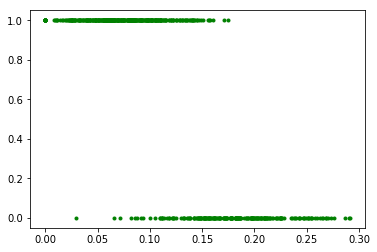

In [28]:
plt.plot(X,Y,'g.')

In [29]:
x=np.array(X)
y=np.array(Y)
x=(x-x.min())/(x.max()-x.min())#didn't need to normalize y for its range is already 0 to 1

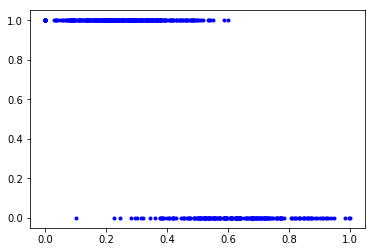

In [33]:
plt.plot(x,y,'b.')

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [41]:
def hypothesis(a,x,b):
    return(1/(1+np.exp(-(a*x+b))))

In [42]:
def error(a,x,b,y):
    e=0
    m=len(x)
    for i in range(m):
        e+=-(y[i]*np.log(hypothesis(a,x[i],b)))-((1-y[i])*np.log(1-hypothesis(a,x[i],b)))
    return (1/m)*e

In [43]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
        grad_a+=(hypothesis(a,x[i],b)-y[i])*x[i]
        grad_b+=(hypothesis(a,x[i],b)-y[i])
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    return a,b

In [44]:
def descend(init_a,x,init_b,y,learning_rate,iterations):
    a=init_a
    b=init_b
    for i in range(iterations):
        e=error(a,x,b,y)
        if i%1000==0:
            print(f"error: {e}, a:{a}, b:{b}")
        a,b=step_gradient(a,x,b,y,learning_rate)
    return a,b

In [53]:
init_a=-16.53797962675754
init_b=7.620286381858101
iterations=10000
learning_rate=0.01

In [54]:
final_a,final_b=descend(init_a,x_train,init_b,y_train,learning_rate,iterations)

error: 0.24822055597079953, a:-16.53797962675754, b:7.620286381858101
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205
error: 0.24822055597079914, a:-16.537979626760016, b:7.620286381859205


In [55]:
final_a,final_b

(-16.537979626760016, 7.620286381859205)

In [56]:
error(final_a,x_test,final_b,y_test)

0.14027902484575006

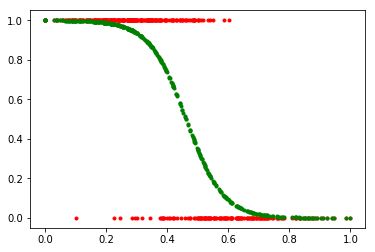

In [57]:
plt.plot(x_train,y_train,'r.',
     x_train,hypothesis(final_a,x_train,final_b),'g.')

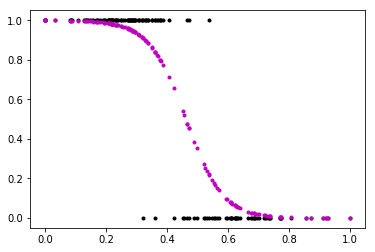

In [59]:
plt.plot(x_test,y_test,'k.',
         x_test,hypothesis(final_a,x_test,final_b),'m.')

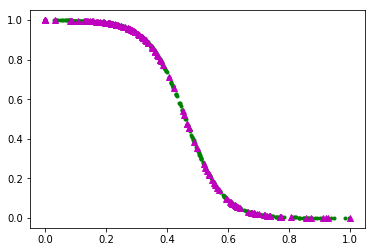

In [63]:
plt.plot( x_train,hypothesis(final_a,x_train,final_b),'g.',
         x_test,hypothesis(final_a,x_test,final_b),'m^')

In [62]:
def accuracy(a,x,b,y):
    correct=0
    m=len(x)
    for i in range(m):
        pred=hypothesis(a,x[i],b)
        if pred>0.5:
            z=1
        else:
            z=0
        if y[i]==z:
            correct+=1
    print(f"Accuracy: {correct/len(y)}")

In [64]:
accuracy(final_a,x_train,final_b,y_train)

Accuracy: 0.8990610328638498


In [65]:
accuracy(final_a,x_test,final_b,y_test)

Accuracy: 0.9440559440559441
